<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Lab 2: Linear Regression </h1>
    <h3></h3>
</center>

## <center> Case 2: Prediction of the house prices

## Coding section (Preview)

<font face="Times New Roman">A real-world example of 3-variate regression could be predicting house prices based on three independent variables: square footage (X1), number of bedrooms (X2), and age of the house (X3).</font>

The relationship between the variables X1 and X2: X1 = (X2+1)*600-C, C is a random value.

## 1. Multiple Linear Regression
The general form of the multiple linear regression model is:
**Y = a*X1 + b*X2 + cX3 + ...+ e**

### 1.1 Data processing

In [116]:
# Load Python packages
import pandas as pd  # pip install pandas
from matplotlib import pyplot as plt  # pip install matplotlib
from sklearn.model_selection import train_test_split

In [117]:
# Load raw data
data = pd.read_csv('house_price_data.csv')  # Returns a pandas DataFrame object

In [118]:
# Display part of raw data
print(data.head(10))  # Display the first 10 rows of DataFrame

   Square Footage  Number of Bedrooms  Age of House    House Price
0            3006                   4            38  192691.836473
1            3806                   5             3  250271.856262
2            3159                   4            12  239246.722955
3            1244                   1            48    -209.645101
4            3145                   4             1  258392.191661
5            1751                   2             4  139803.773511
6             835                   0            43   25363.187562
7            1907                   2            26  113253.983376
8            2275                   3            31  137329.213492
9            2598                   3            20  163148.482995


In [119]:
X = data[['Square Footage', 'Number of Bedrooms', 'Age of House']]
Y = data['House Price']

Text(0, 0.5, 'House Price')

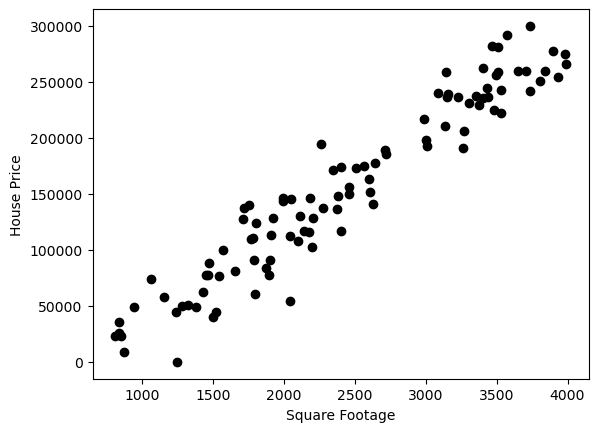

In [120]:
# Visualize the distribution of raw data
X_ = data['Square Footage']
plt.scatter(X_,Y, color='black')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
# plt.show()

In [121]:
# obtain training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3, shuffle=True)

### 1.2 Model training and prediction

In [122]:
# Build a linear regression model and fit the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print('斜率:', model.coef_)
print('截距:', model.intercept_)



斜率: [   40.23022714 25131.26718684 -1124.41568675]
截距: 11868.037672282924


In [ ]:
# Prediction
y_pred = model.predict(X_test)

### 1.3 Performance metrics

In [ ]:
# Calculate R-squared
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('均方误差:', MSE)
print('R方:', r2)

均方误差: 416811371.5917746
R方: 0.8843124604899917


### 1.4 Visualizing results

In [ ]:
import matplotlib.pyplot as plt  # conda install matplotlib
import seaborn as sns  # conda install seaborn
from mpl_toolkits.mplot3d import Axes3D


### 3.1 Correlation Matrix Heatmap

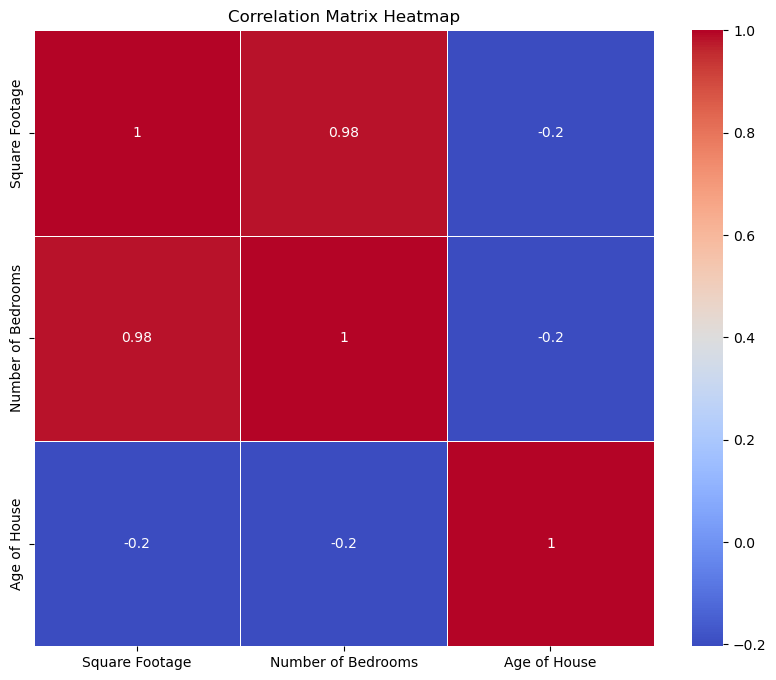

In [126]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3.2 2D Regression Plane Plot on the independent variable: Square Footage

Text(0, 0.5, 'House Price')

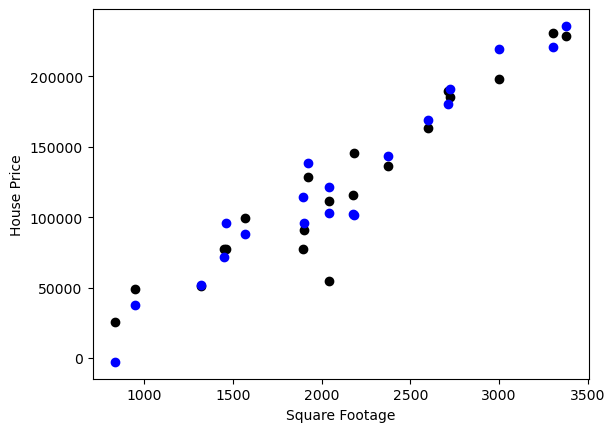

In [127]:
# Plot the fitted regression points on the testing dataset.
X_test_ = X_test['Square Footage']
plt.scatter(X_test_,y_test, color='black')
plt.scatter(X_test_, y_pred, color='blue') 
plt.xlabel('Square Footage')
plt.ylabel('House Price')
#plt.show()

### 1.5 Construction of the Linear Regression Equation

In [128]:
print('The weight coefficient is: ' + str(model.coef_))
print('The bias coefficient is: ' + str(model.intercept_))

The weight coefficient is: [   40.23022714 25131.26718684 -1124.41568675]
The bias coefficient is: 11868.037672282924


Thus, the equation of the fitted linear regression curve is:：**Y = 40*X1 + 25131*X2 - 1124X3 + 11868**

## 3. Regularization

### 3.1 L1

In [129]:
# build a linear regression model with L1 regularization
from sklearn.linear_model import Lasso

lambda_=100
model_lasso = Lasso(alpha = lambda_, fit_intercept=True,copy_X=True)


In [130]:
# fit the data
model_lasso.fit(X_train,y_train)


,alpha,100
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [131]:
#  predict the data
y_pred_lasso = model_lasso.predict(X_test)

In [132]:
# Calculate R-squared and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE=mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print('均方误差:', MSE)
print('R方:', r2_lasso)


均方误差: 412540661.5195356
R方: 0.8854978118836715


Text(0, 0.5, 'House Price')

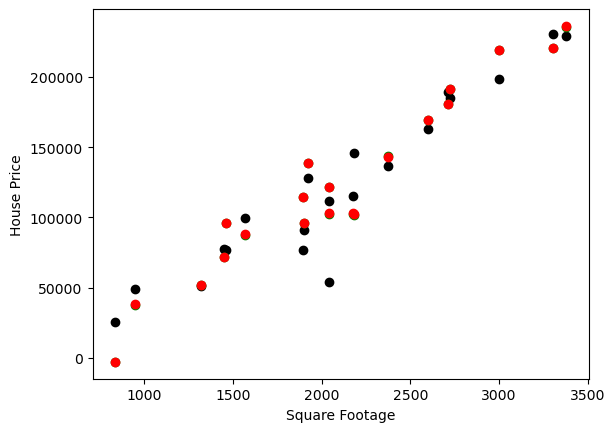

In [142]:
# Plot the fitted regression points on the testing dataset.
X_test_ = X_test['Square Footage']
plt.scatter(X_test_,y_test, color='black')
plt.scatter(X_test_,y_pred, color='green') 
plt.scatter(X_test_,y_pred_lasso, color='red') 
plt.xlabel('Square Footage')
plt.ylabel('House Price')
# plt.show()

In [134]:
print('The weight coefficient is: ' + str(model_lasso.coef_))
print('The bias coefficient is: ' + str(model_lasso.intercept_))

The weight coefficient is: [   42.35891286 23826.17710789 -1125.02868403]
The bias coefficient is: 10407.031402639957


### 3.2 L2

In [135]:
# build a linear regression model with L2 regularization
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=lambda_,fit_intercept=True,copy_X=True)


In [136]:
# fit the data
model_ridge.fit(X_train, y_train)

,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [137]:
# predict
y_pred_ridge = model_ridge.predict(X_test)

In [138]:
# Calculate R-squared and mean squared error
from sklearn.metrics import mean_squared_error, r2_score
MSE=mean_squared_error(y_test,y_pred_ridge)
R2=r2_score(y_test,y_pred_ridge)
print("mean_squared_error:",MSE)
print("r2_score:",R2)

mean_squared_error: 379640289.2360881
r2_score: 0.8946294320309335


Text(0, 0.5, 'House Price')

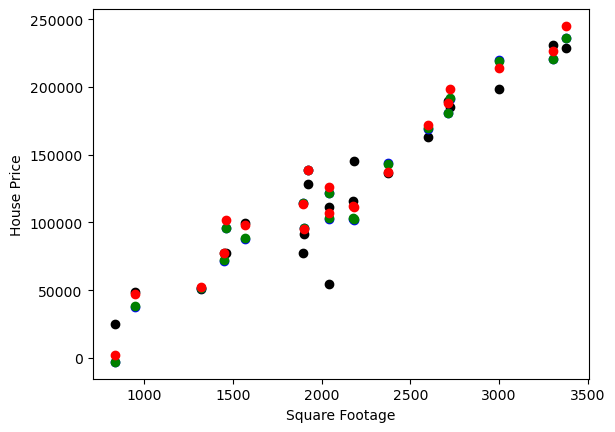

In [143]:
# Plot the fitted regression points on the testing dataset.
X_test_ = X_test['Square Footage']
plt.scatter(X_test_,y_test, color='black')
plt.scatter(X_test_, y_pred, color='blue') 
plt.scatter(X_test_, y_pred_lasso, color='green') 
plt.scatter(X_test_, y_pred_ridge, color='red') 
plt.xlabel('Square Footage')
plt.ylabel('House Price')
#plt.show()

In [144]:
print('The weight coefficient is: ' + str(model_ridge.coef_))
print('The bias coefficient is: ' + str(model_ridge.intercept_))

The weight coefficient is: [   78.84076579  1453.73598324 -1137.54828461]
The bias coefficient is: -14571.660979583074
